In [132]:
import pandas as pd
import numpy as np
import yellowbrick
import matplotlib as plt
import seaborn as sns
import bokeh
import io
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)


In [28]:
df = pd.read_csv('../../downloads/crashes/data/Crash_Details_Table.csv', header = 0)
print(df)

        OBJECTID   CRIMEID       CCN  PERSONID PERSONTYPE   AGE FATAL  \
0       61035005  24674744  13101652  84867289     Driver  34.0     N   
1       61035006  24668659  13099590  84894742     Driver  45.0     N   
2       61035007  24674040  13102542  84701349     Driver  64.0     N   
3       61035008  24678138  13104277  84976435     Driver   NaN     N   
4       61986561  24678354  13103641  84750291     Driver   NaN     N   
5       61986562  24680644  13104743  85007528     Driver  36.0     N   
6       61986563  24682398  13106280  84638041     Driver   NaN     N   
7       61986564  24682398  13106280  84597562     Driver  51.0     N   
8       61986565  24678704  13103616  84872340     Driver   NaN     N   
9       61986566  24670484  13100066  84575668     Driver  59.0     N   
10      61986567  24674694  13102045  84978154     Driver  34.0     N   
11      61986568  24674843  13101807  84567591     Driver  27.0     N   
12      61986569  24672304  13101314  84963727     

/Users/adammorris/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
df1 = df[['PERSONTYPE', 'AGE','MAJORINJURY', 'MINORINJURY', 'INVEHICLETYPE', 'LICENSEPLATESTATE','IMPAIRED', 'SPEEDING']] 

In [30]:
df1.head()

,PERSONTYPE,AGE,MAJORINJURY,MINORINJURY,INVEHICLETYPE,LICENSEPLATESTATE,IMPAIRED,SPEEDING
0,Driver,34.0,N,Y,Other Vehicle,NaN,N,N
1,Driver,45.0,N,N,Passenger Car/automobile,MD,N,N
2,Driver,64.0,N,N,Suv (sport Utility Vehicle),MD,N,N
3,Driver,NaN,N,N,Passenger Car/automobile,DC,N,N
4,Driver,NaN,N,N,Passenger Car/automobile,MD,N,N


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316886 entries, 0 to 316885
Data columns (total 8 columns):
PERSONTYPE           316886 non-null object
AGE                  202227 non-null float64
MAJORINJURY          316886 non-null object
MINORINJURY          316886 non-null object
INVEHICLETYPE        316801 non-null object
LICENSEPLATESTATE    289914 non-null object
IMPAIRED             316886 non-null object
SPEEDING             316886 non-null object
dtypes: float64(1), object(7)
memory usage: 19.3+ MB


In [32]:
df1.tail()

,PERSONTYPE,AGE,MAJORINJURY,MINORINJURY,INVEHICLETYPE,LICENSEPLATESTATE,IMPAIRED,SPEEDING
316881,Driver,77.0,Y,N,Passenger Car/automobile,DC,N,N
316882,Driver,53.0,Y,N,Passenger Car/automobile,VA,N,N
316883,Driver,38.0,N,N,Passenger Car/automobile,VA,N,N
316884,Driver,NaN,N,N,Passenger Car/automobile,VA,N,N
316885,Driver,28.0,N,N,Firearms,DC,N,N


In [33]:
df1.loc[(df["AGE"] > 34.0)]

,PERSONTYPE,AGE,MAJORINJURY,MINORINJURY,INVEHICLETYPE,LICENSEPLATESTATE,IMPAIRED,SPEEDING
1,Driver,45.0,N,N,Passenger Car/automobile,MD,N,N
2,Driver,64.0,N,N,Suv (sport Utility Vehicle),MD,N,N
5,Driver,36.0,N,N,Passenger Van,DC,N,N
7,Driver,51.0,N,N,Passenger Car/automobile,DC,N,N
9,Driver,59.0,N,N,Firearms,MD,N,N
12,Driver,56.0,N,N,Other Vehicle,DC,N,N
13,Driver,61.0,N,N,Passenger Car/automobile,DC,N,N
14,Driver,61.0,N,N,Passenger Van,DC,N,N
16,Driver,53.0,N,N,Pickup Truck,NaN,N,N
19,Driver,35.0,N,N,Other Vehicle,DC,N,N


/Users/adammorris/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/adammorris/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


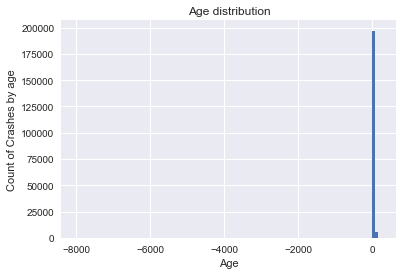

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df1['AGE'], bins = 100, range = (df1['AGE'].min(),df1['AGE'].max()))
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count of Crashes by age')
plt.show()

In [90]:
g = sns.factorplot("AGE", col="LICENSEPLATESTATE", col_wrap=4, 
                   data=df[df.age.notnull()], kind="count", size=4, aspect=.8)

AttributeError: 'DataFrame' object has no attribute 'age'

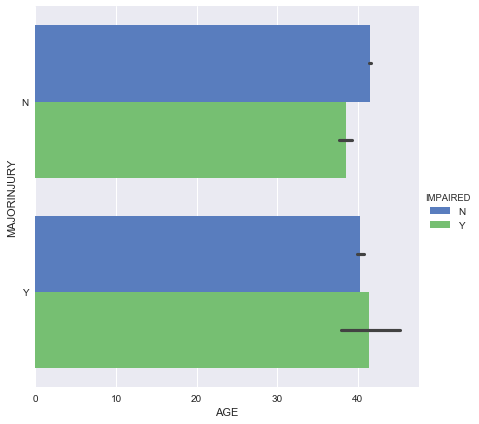

In [51]:
g = sns.factorplot(x="AGE", 
                   y="MAJORINJURY", 
                   hue="IMPAIRED", 
                   data=df1,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("MAJORINJURY")

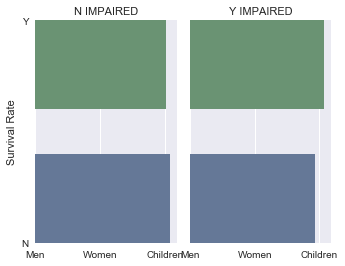

In [52]:
g = sns.factorplot(x="AGE", 
                   y="MAJORINJURY", 
                   col="IMPAIRED", 
                   data=df1, 
                   saturation=.5, kind="bar", ci=None,aspect=.6)
(g.set_axis_labels("AGE", "MAJORINJURY").set_xticklabels(["Men", "Women", "Children"]).set_titles
 ("{col_name} {col_var}").set(ylim=(0, 1)).despine(left=True))

/Users/adammorris/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


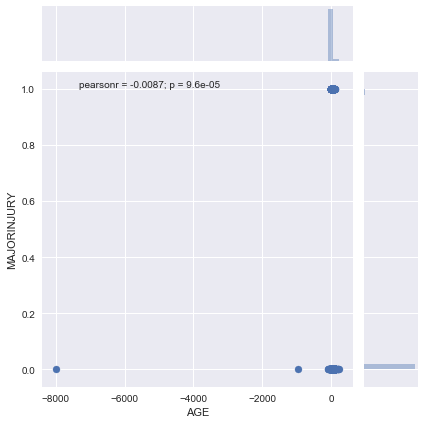

In [79]:
g = sns.jointplot("AGE", "MAJORINJURY", df1)

In [138]:
df1.IMPAIRED.replace(('Y', 'N'), (1, 0), inplace=True)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [57]:
df1.head()

,PERSONTYPE,AGE,MAJORINJURY,MINORINJURY,INVEHICLETYPE,LICENSEPLATESTATE,IMPAIRED,SPEEDING
0,Driver,34.0,N,Y,Other Vehicle,NaN,0,N
1,Driver,45.0,N,N,Passenger Car/automobile,MD,0,N
2,Driver,64.0,N,N,Suv (sport Utility Vehicle),MD,0,N
3,Driver,NaN,N,N,Passenger Car/automobile,DC,0,N
4,Driver,NaN,N,N,Passenger Car/automobile,MD,0,N


In [58]:
df1.SPEEDING.replace(('Y', 'N'), (1, 0), inplace=True)

/Users/adammorris/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [59]:
df1.head()

,PERSONTYPE,AGE,MAJORINJURY,MINORINJURY,INVEHICLETYPE,LICENSEPLATESTATE,IMPAIRED,SPEEDING
0,Driver,34.0,N,Y,Other Vehicle,NaN,0,0
1,Driver,45.0,N,N,Passenger Car/automobile,MD,0,0
2,Driver,64.0,N,N,Suv (sport Utility Vehicle),MD,0,0
3,Driver,NaN,N,N,Passenger Car/automobile,DC,0,0
4,Driver,NaN,N,N,Passenger Car/automobile,MD,0,0


In [60]:
df1.MAJORINJURY.replace(('Y', 'N'), (1, 0), inplace=True)

/Users/adammorris/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [61]:
df1.head()

,PERSONTYPE,AGE,MAJORINJURY,MINORINJURY,INVEHICLETYPE,LICENSEPLATESTATE,IMPAIRED,SPEEDING
0,Driver,34.0,0,Y,Other Vehicle,NaN,0,0
1,Driver,45.0,0,N,Passenger Car/automobile,MD,0,0
2,Driver,64.0,0,N,Suv (sport Utility Vehicle),MD,0,0
3,Driver,NaN,0,N,Passenger Car/automobile,DC,0,0
4,Driver,NaN,0,N,Passenger Car/automobile,MD,0,0


In [63]:
df1.MINORINJURY.replace(('Y', 'N'), (1, 0), inplace=True)

/Users/adammorris/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [64]:
df1.head()

,PERSONTYPE,AGE,MAJORINJURY,MINORINJURY,INVEHICLETYPE,LICENSEPLATESTATE,IMPAIRED,SPEEDING
0,Driver,34.0,0,1,Other Vehicle,NaN,0,0
1,Driver,45.0,0,0,Passenger Car/automobile,MD,0,0
2,Driver,64.0,0,0,Suv (sport Utility Vehicle),MD,0,0
3,Driver,NaN,0,0,Passenger Car/automobile,DC,0,0
4,Driver,NaN,0,0,Passenger Car/automobile,MD,0,0


In [67]:
df1.head()

,PERSONTYPE,AGE,MAJORINJURY,MINORINJURY,INVEHICLETYPE,LICENSEPLATESTATE,IMPAIRED,SPEEDING
0,Driver,34.0,0,1,Other Vehicle,NaN,0,0
1,Driver,45.0,0,0,Passenger Car/automobile,MD,0,0
2,Driver,64.0,0,0,Suv (sport Utility Vehicle),MD,0,0
3,Driver,NaN,0,0,Passenger Car/automobile,DC,0,0
4,Driver,NaN,0,0,Passenger Car/automobile,MD,0,0


In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316886 entries, 0 to 316885
Data columns (total 8 columns):
PERSONTYPE           316886 non-null object
AGE                  202227 non-null float64
MAJORINJURY          316886 non-null int64
MINORINJURY          316886 non-null int64
INVEHICLETYPE        316801 non-null object
LICENSEPLATESTATE    289914 non-null object
IMPAIRED             316886 non-null int64
SPEEDING             316886 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 19.3+ MB


In [78]:
df1.drop(['PERSONTYPE'], axis=1)

,AGE,MAJORINJURY,MINORINJURY,INVEHICLETYPE,LICENSEPLATESTATE,IMPAIRED,SPEEDING
0,34.0,0,1,Other Vehicle,NaN,0,0
1,45.0,0,0,Passenger Car/automobile,MD,0,0
2,64.0,0,0,Suv (sport Utility Vehicle),MD,0,0
3,NaN,0,0,Passenger Car/automobile,DC,0,0
4,NaN,0,0,Passenger Car/automobile,MD,0,0
5,36.0,0,0,Passenger Van,DC,0,0
6,NaN,0,0,Passenger Car/automobile,DC,0,0
7,51.0,0,0,Passenger Car/automobile,DC,0,0
8,NaN,0,0,Passenger Car/automobile,DC,0,0
9,59.0,0,0,Firearms,MD,0,0


In [91]:
df1.head()

,PERSONTYPE,AGE,MAJORINJURY,MINORINJURY,INVEHICLETYPE,LICENSEPLATESTATE,IMPAIRED,SPEEDING
0,Driver,34.0,0,1,Other Vehicle,NaN,0,0
1,Driver,45.0,0,0,Passenger Car/automobile,MD,0,0
2,Driver,64.0,0,0,Suv (sport Utility Vehicle),MD,0,0
3,Driver,NaN,0,0,Passenger Car/automobile,DC,0,0
4,Driver,NaN,0,0,Passenger Car/automobile,MD,0,0


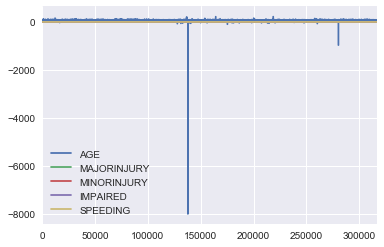

In [95]:
df1.plot()

/Users/adammorris/anaconda/lib/python3.5/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


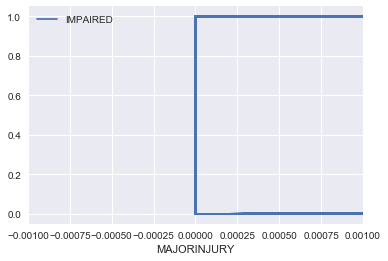

In [120]:
df1.plot(x= 'MAJORINJURY', y= 'IMPAIRED')

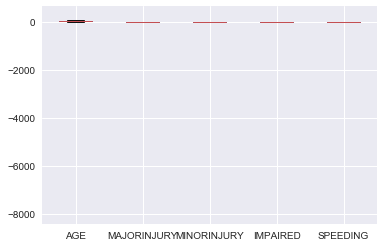

In [99]:
df1.plot(kind= 'box')

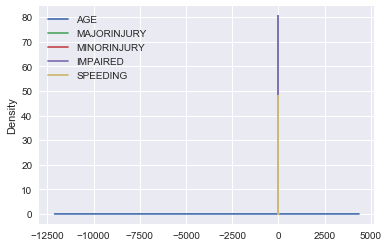

In [101]:
df1.plot(kind = 'kde')

In [104]:
df1.plot(kind = 'pie')

ValueError: pie requires either y column or 'subplots=True'

In [113]:
df1.plot(kind= 'hexbin')

ValueError: hexbin requires and x and y column

In [123]:
# Specify the features of interest
features = ['AGE', 'MINORINJURY', 'INVEHICLETYPE', 'LICENSEPLATESTATE', 'IMPAIRED', 'SPEEDING'
    ]

# Extract the numpy arrays from the data frame
X = df1[features].as_matrix()
y = df1.MAJORINJURY.as_matrix()

In [139]:
df1.head()

,PERSONTYPE,AGE,MAJORINJURY,MINORINJURY,INVEHICLETYPE,LICENSEPLATESTATE,IMPAIRED,SPEEDING
0,Driver,34.0,0,1,Other Vehicle,NaN,0,0
1,Driver,45.0,0,0,Passenger Car/automobile,MD,0,0
2,Driver,64.0,0,0,Suv (sport Utility Vehicle),MD,0,0
3,Driver,NaN,0,0,Passenger Car/automobile,DC,0,0
4,Driver,NaN,0,0,Passenger Car/automobile,MD,0,0


In [124]:
visualizer = Rank1D(features=features, algorithm='shapiro')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

NameError: name 'Rank1D' is not defined

In [136]:
from yellowbrick.features.rankd import Rank2D
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [ ]:
from yellowbrick.features.radviz import RadViz
from yellowbrick.features.pcoords import ParallelCoordinates
from yellowbrick.features.jointplot import JointPlotVisualizer
from yellowbrick.features.pca import PCADecomposition
from yellowbrick.features.scatter import ScatterVisualizer